In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

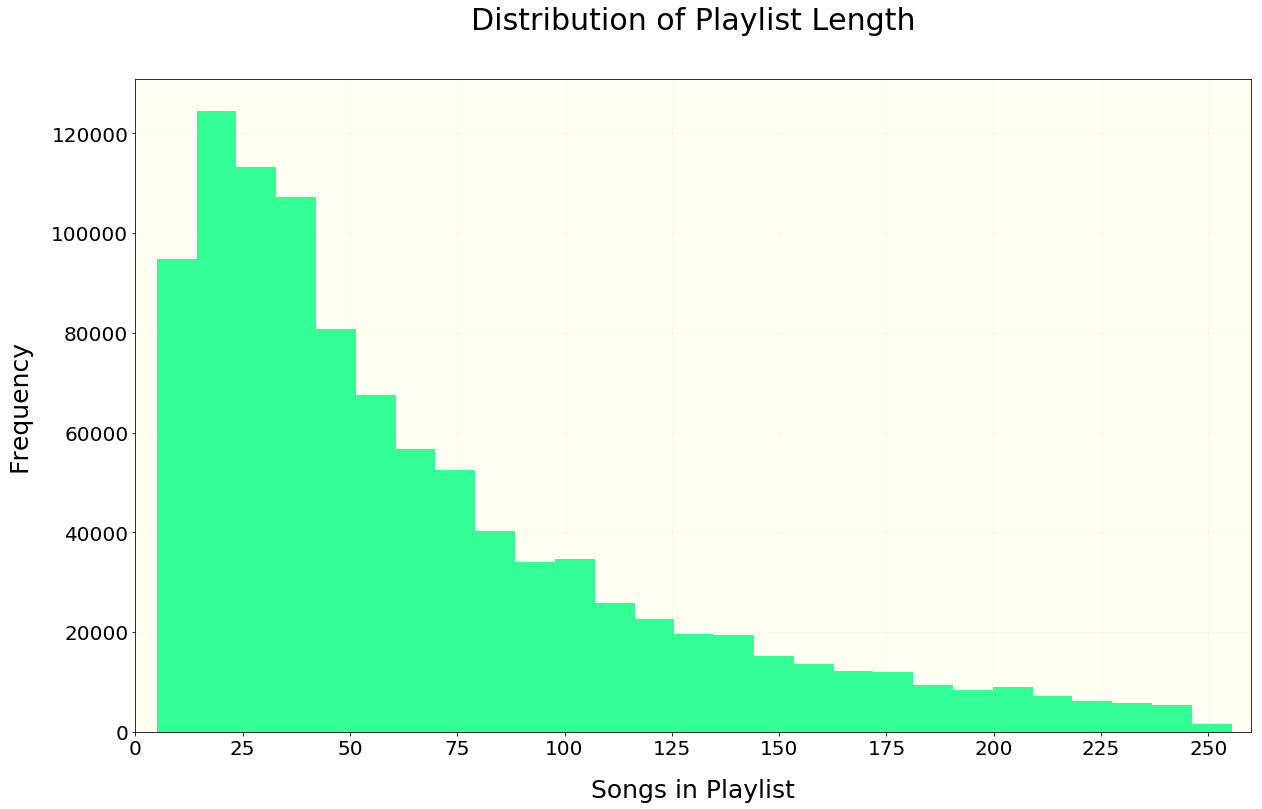

In [3]:
from length_hist import length
x = []
for key in length:
    x += [key] * length[key]

fig, ax = plt.subplots(1,1, figsize = (20,12))
ax.set_facecolor((1,1,.95))
ax.set_xlabel("Songs in Playlist", fontsize = 25, labelpad = 20)
ax.set_ylabel("Frequency", fontsize = 25, labelpad = 20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.grid(alpha = .1)
ax.set_title("Distribution of Playlist Length", fontsize = 30, pad = 50)
ax.set_xlim(0,260)
ax.set_xticks(np.round(np.linspace(0, 250, 11)))
ax = plt.hist(x, bins = 40, color = 'springgreen', alpha = .8)

plt.savefig("Length Hist", format = 'png')




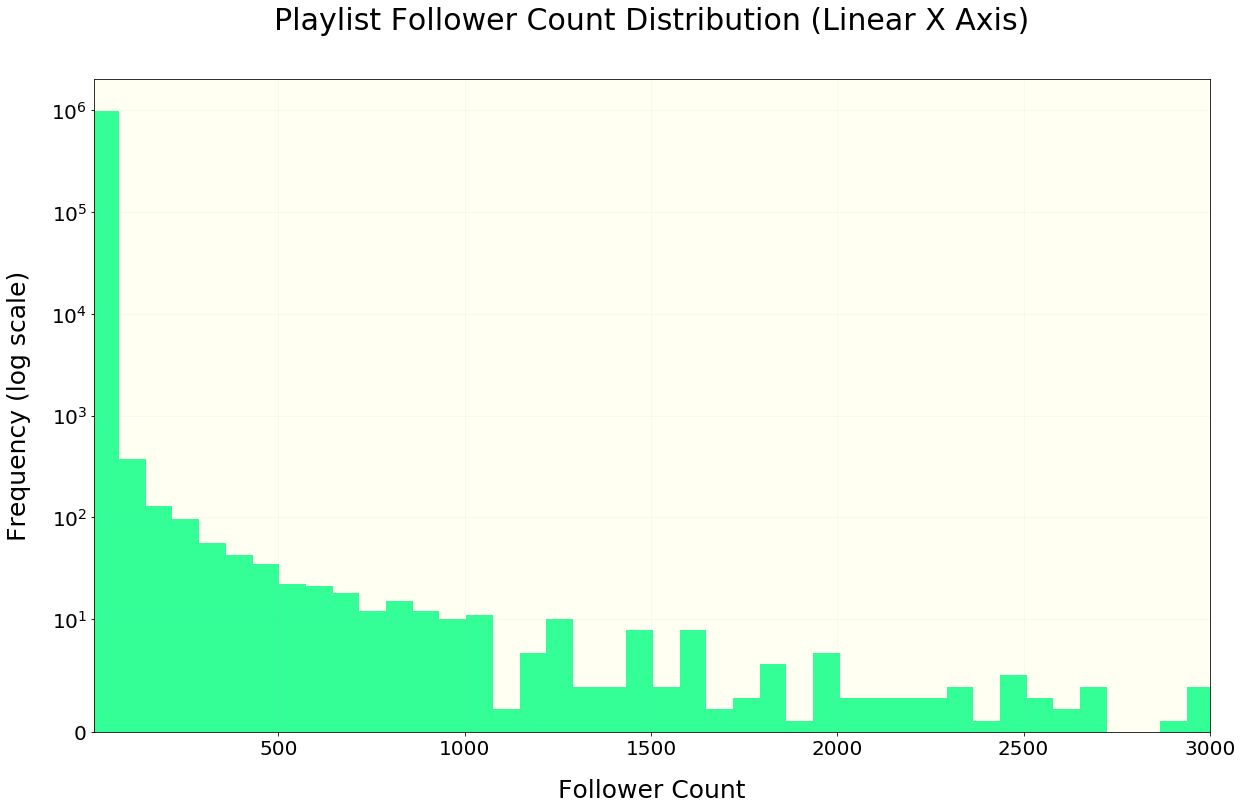

In [69]:
from followers import followers

x = []
for key in followers:
    x += [key] * followers[key]

titles = ["Linear X Axis", "Logorithmic X Axis"]
fig, ax = plt.subplots(1,1, figsize = (20, 12))


ax.set_xlim(5,3000)
ax.set_facecolor((1,1,.95))
ax.set_xlabel("Follower Count", fontsize = 25, labelpad = 20)
ax.set_ylabel("Frequency (log scale)", fontsize = 25, labelpad = 20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.grid(alpha = .1)
ax.set_title("Playlist Follower Count Distribution (" + titles[0] + ")", fontsize = 30, pad = 50)
ax.set_yscale('symlog', linthreshy = 10)
ax.hist(x, bins = 1000, color = 'springgreen', alpha = .8)


plt.savefig("Followers Hist Linear.png", format = 'png')

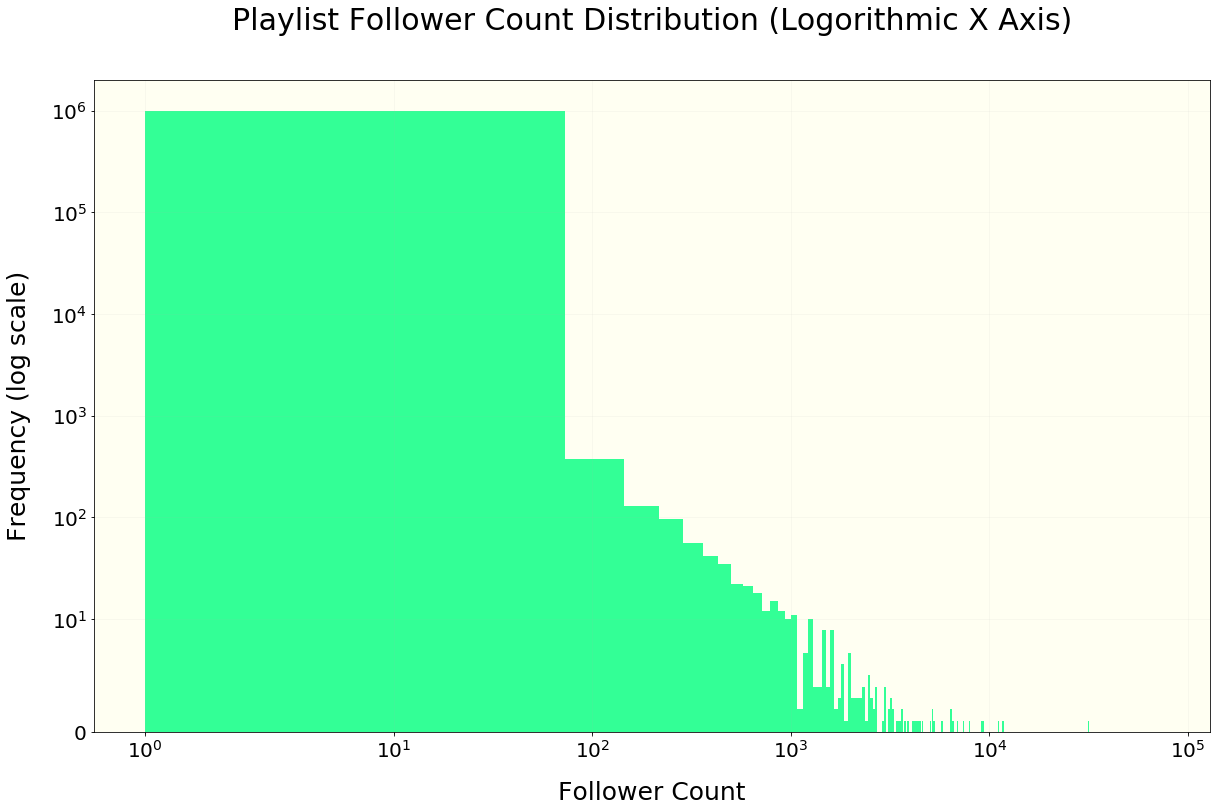

In [72]:
fig, ax = plt.subplots(1,1, figsize = (20, 12))

ax.set_xscale('symlog', linthreshy = 10)
ax.set_facecolor((1,1,.95))
ax.set_xlabel("Follower Count", fontsize = 25, labelpad = 20)
ax.set_ylabel("Frequency (log scale)", fontsize = 25, labelpad = 20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.grid(alpha = .1)
ax.set_title("Playlist Follower Count Distribution (" + titles[1] + ")", fontsize = 30, pad = 50)
ax.set_yscale('symlog', linthreshy = 10)
ax.hist(x, bins = 1000, color = 'springgreen', alpha = .8)


plt.savefig("Followers Hist Log.png", format = 'png')

In [108]:
top_titles = []
with open("/Users/johndaciuk/Desktop/top_playlist_titles.txt", 'r') as f:
    for line in f:
        info_dict = {}
        info = line.split()
        frequency, title = info[0], info[1]
        frequency = int(frequency)
        info_dict["frequency"] = frequency
        info_dict["playlist title"] = title
        top_titles.append(info_dict)
top = pd.DataFrame(top_titles)
top.head(30)

,frequency,playlist title
0,10000,country
1,10000,chill
2,8493,rap
3,8481,workout
4,8146,oldies
5,8015,christmas
6,6848,rock
7,6157,party
8,5883,throwback
9,5063,jams


In [109]:
top_tracks = []
with open("/Users/johndaciuk/Desktop/top_tracks.txt", 'r') as f:
    for line in f:
        info_dict = {}
        info = line.split()
        frequency = info[0]
        title = ""
        for i in range(1, len(info)):
            if i == len(info) - 1:
                title += str(info[i])
            else:
                title += str(info[i]) + " "
        frequency = int(frequency)
        info_dict["frequency"] = frequency
        info_dict["song title"] = title
        top_tracks.append(info_dict)
top = pd.DataFrame(top_tracks)
top.head(30)

,frequency,song title
0,46574,HUMBLE. by Kendrick Lamar
1,43447,One Dance by Drake
2,41309,Broccoli (feat. Lil Yachty) by DRAM
3,41079,Closer by The Chainsmokers
4,39987,Congratulations by Post Malone
5,35202,Caroline by Aminé
6,35138,iSpy (feat. Lil Yachty) by KYLE
7,34999,Bad and Boujee (feat. Lil Uzi Vert) by Migos
8,34990,Location by Khalid
9,34922,XO TOUR Llif3 by Lil Uzi Vert


In [103]:
top_artists = []
with open("/Users/johndaciuk/Desktop/top_artists.txt", 'r') as f:
    for line in f:
        info_dict = {}
        info = line.split()
        frequency = info[0]
        artist = ""
        for i in range(1, len(info)):
            if i == len(info) - 1:
                artist += str(info[i])
            else:
                artist += str(info[i]) + " "
        frequency = int(frequency)
        info_dict["frequency"] = frequency
        info_dict["artist"] = artist
        top_artists.append(info_dict)
top = pd.DataFrame(top_artists)
top.head(30)

,artist,frequency
0,Drake,847160
1,Kanye West,413297
2,Kendrick Lamar,353624
3,Rihanna,339570
4,The Weeknd,316603
5,Eminem,294667
6,Ed Sheeran,272116
7,Future,250734
8,Justin Bieber,243119
9,J. Cole,241560


In [107]:
basic_stats = []
with open("/Users/johndaciuk/Desktop/basic_stats.txt", 'r') as f:
    for line in f:
        info_dict = {}
        info = line.split()
        Number_of = info[-1]
        item = ""
        for i in range(2, len(info)-1):
            if i == len(info) - 1:
                item += str(info[i])
            else:
                item += str(info[i]) + " "
        Number_of = int(Number_of)
        info_dict["Number of"] = Number_of
        info_dict["item"] = item
        basic_stats.append(info_dict)
top = pd.DataFrame(basic_stats)
top.head(8)

,Number of,item
0,1000000,playlists
1,66346428,tracks
2,2262292,unique tracks
3,734684,unique albums
4,295860,unique artists
5,92944,unique titles
6,18760,playlists with descriptions
7,17381,unique normalized titles
